In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('data/housing.csv')

In [3]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6., np.inf], labels=[1,2,3,4,5])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[train_index]


In [5]:
for set_ in (strat_train_set, strat_test_set) :
    set_.drop('income_cat', axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

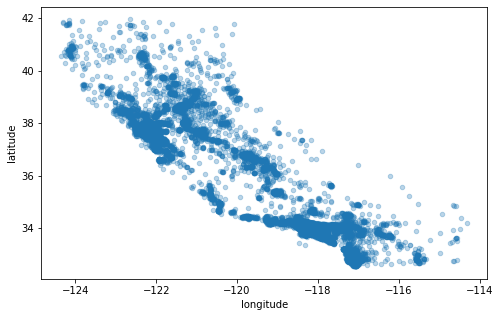

In [6]:
housing = strat_train_set.copy()

housing.plot(kind='scatter', x='longitude',y='latitude', figsize=(8,5), alpha=0.3)

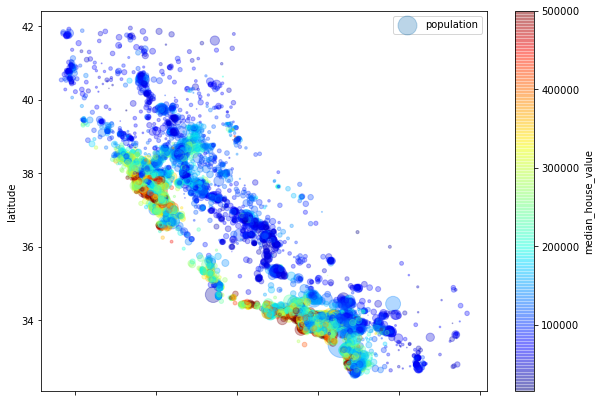

In [7]:
housing.plot(kind='scatter', x='longitude',y='latitude', figsize=(10,7), alpha=0.3, s=housing['population']/50, label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

### Prepare the data for machine learning algorithms

In [8]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

**Data cleaning**

Options
1. Get rid of the corresponding districts
   
2. Get rid of the whole attributes
3. Set the values to some value

### SimpleImputer
개별 column에 있는 null에 값을 넣기 위해 median, mean 등을 한 번에 계산하는 방법

In [9]:
# housing.dropna(subset=['total_bedrooms'])
# housing.drop('total_bedrooms',axis=1)
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median, inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)


### 결과는 아래와 같지만 
print(imputer.statistics_)
print(housing_num.median().values)


### transform으로 한방에 모든 attribute에 median을 넣을 수 있다.
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


### Handling Text and Categorical Attributes

Ordinal : attributes 간 연관성이 있을때 ex) excellent, good, bad

nominal : 대상관 연관성이 없을때 ex) 그냥 대상 분류

In [10]:
housing_cat = housing[['ocean_proximity']]
# housing_cat.head(10)

In [11]:
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder = OrdinalEncoder()
housing_cat_encoded = OrdinalEncoder.fit_transform(housing_cat)


from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])